In [1]:
import json
import numpy as np
import time 
import math
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
phoneme_vocabulary = json.load(open(r"C:\Users\dhruv\Documents\DA-IICT\sem-2\AML\AML Project\code\phoneme_vocabulary.json","r"))

len(phoneme_vocabulary)

42

In [3]:
phoneme_vocabulary

{'AA': 0,
 'AE': 1,
 'AH': 2,
 'AO': 3,
 'AW': 4,
 'AY': 5,
 'B': 6,
 'CH': 7,
 'D': 8,
 'DH': 9,
 'EH': 10,
 'ER': 11,
 'EY': 12,
 'F': 13,
 'G': 14,
 'HH': 15,
 'IH': 16,
 'IY': 17,
 'JH': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'NG': 23,
 'OW': 24,
 'OY': 25,
 'P': 26,
 'R': 27,
 'S': 28,
 'SH': 29,
 'T': 30,
 'TH': 31,
 'UH': 32,
 'UW': 33,
 'V': 34,
 'W': 35,
 'Y': 36,
 'Z': 37,
 'ZH': 38,
 'SIL': 39,
 'SPN': 40,
 'UNK': 41}

In [4]:
total_phoneme_list_dict = json.load(open(r"C:\Users\dhruv\Documents\DA-IICT\sem-2\AML\AML Project\code\total_phoneme_list_dict.json","r"))

len(total_phoneme_list_dict)

1

In [5]:
len(total_phoneme_list_dict["phoneme_list"])

1034604

In [6]:
phoneme_list = total_phoneme_list_dict["phoneme_list"]
phoneme_list[:10]

['SIL', 'UNK', 'IH0', 'N', 'DH', 'AH0', 'OW1', 'N', 'SIL', 'N']

In [7]:
def get_base_phoneme(phoneme):
    """ 
    we have to convert this phoneme to their base form. for ex. IH0 --> IH 
    ## this 0, 1, 2 are for showing the stress  0: No stress.
                                                1: Primary stress.
                                                2: Secondary stress.
    """
    return ''.join([c for c in phoneme if not c.isdigit()])

In [8]:
def create_cooccurrence_matrix(sequence, vocab, window_size=2):
    vocab_size = len(vocab)
    matrix = np.zeros((vocab_size, vocab_size), dtype=int)
    
    # Window size of 3: consider current phoneme and next 2 phonemes
    window_size = window_size
    
    # Slide the window across the sequence
    for i in range(len(sequence) - window_size + 1):
        # Get the current window of 3 phonemes
        window = sequence[i:i + window_size]
        
        # Convert all phonemes in the window to their base form
        base_phonemes = [get_base_phoneme(p) for p in window]
        
        # Consider all pairs within the window
        for j in range(len(base_phonemes)):
            for k in range(j + 1, len(base_phonemes)):
                phoneme1 = base_phonemes[j]
                phoneme2 = base_phonemes[k]
                
                # Check if both phonemes are in the vocabulary
                if phoneme1 in vocab and phoneme2 in vocab:
                    idx1 = vocab[phoneme1]
                    idx2 = vocab[phoneme2]
                    # Increment co-occurrence in both directions for symmetry
                    matrix[idx1][idx2] += 1
                    matrix[idx2][idx1] += 1
    
    return matrix

In [11]:
cooccurrence_matrix_2 = create_cooccurrence_matrix(phoneme_list, phoneme_vocabulary)
cooccurrence_matrix_2

array([[    0,     0,    88, ...,  5576,     0,   203],
       [    0,     0,   220, ...,  7192,     0,   542],
       [   88,   220,   400, ..., 36983,     0,  7156],
       ...,
       [ 5576,  7192, 36983, ..., 23158,     0, 23637],
       [    0,     0,     0, ...,     0,     0,     0],
       [  203,   542,  7156, ..., 23637,     0,    20]])

In [12]:
cooccurrence_matrix_3 = create_cooccurrence_matrix(phoneme_list, phoneme_vocabulary, 3)
cooccurrence_matrix_3

array([[  4320,    303,   3178, ...,  16765,      0,   1458],
       [   303,   5580,   4663, ...,  21882,      0,   2293],
       [  3178,   4663,  42286, ..., 113392,      0,  19193],
       ...,
       [ 16765,  21882, 113392, ...,  59904,      0,  67331],
       [     0,      0,      0, ...,      0,      0,      0],
       [  1458,   2293,  19193, ...,  67331,      0,   9196]])

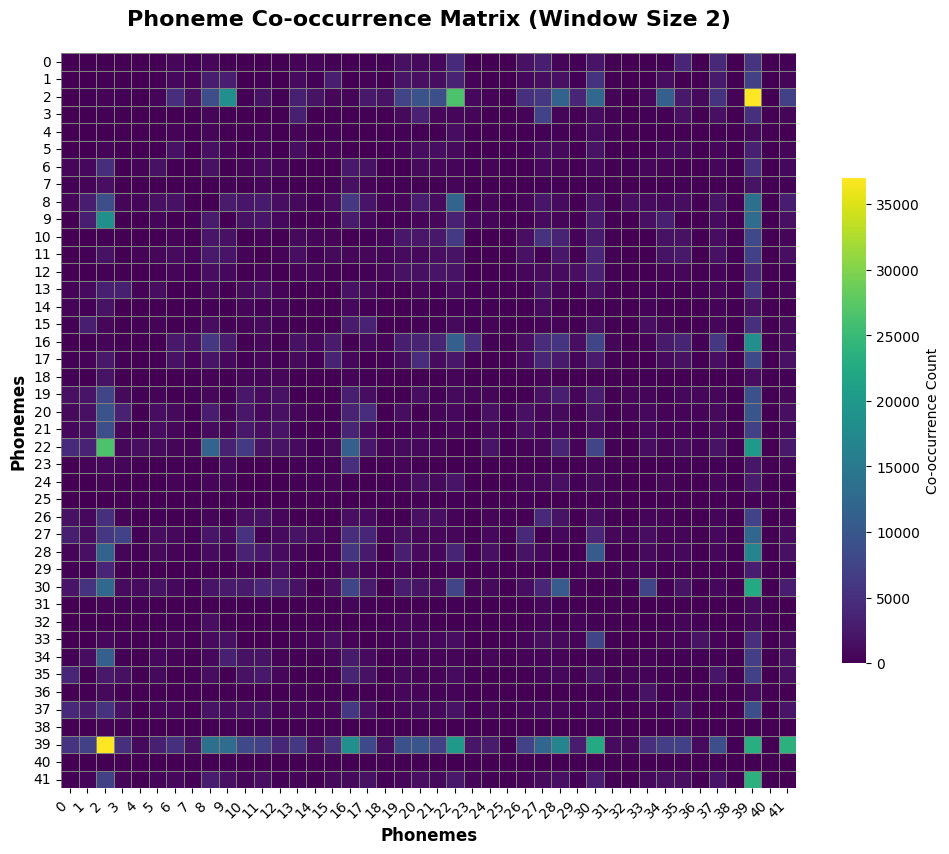

In [26]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    cooccurrence_matrix_2,
    # annot=True,
    # fmt='d',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': .5, 'label': 'Co-occurrence Count'}
)
plt.title('Phoneme Co-occurrence Matrix (Window Size 2)', fontsize=16, pad=20, weight='bold')
plt.xlabel('Phonemes', fontsize=12, weight='bold')
plt.ylabel('Phonemes', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

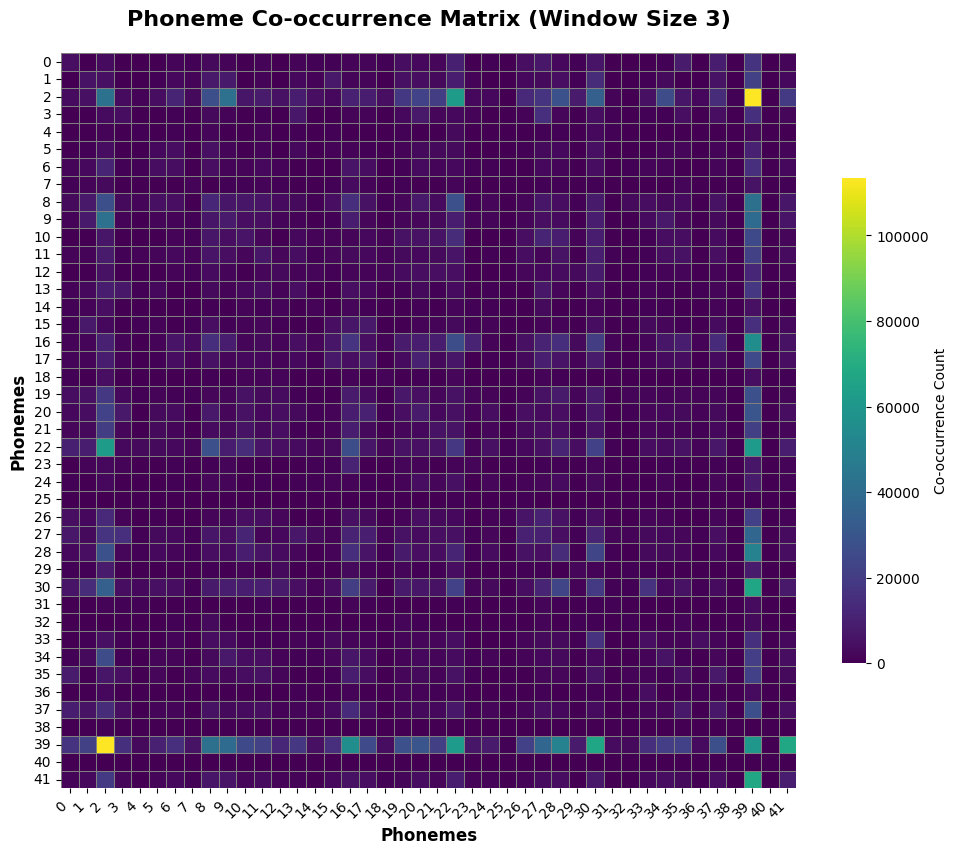

In [27]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    cooccurrence_matrix_3,
    # annot=True,
    # fmt='d',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': .5, 'label': 'Co-occurrence Count'}
)
plt.title('Phoneme Co-occurrence Matrix (Window Size 3)', fontsize=16, pad=20, weight='bold')
plt.xlabel('Phonemes', fontsize=12, weight='bold')
plt.ylabel('Phonemes', fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()


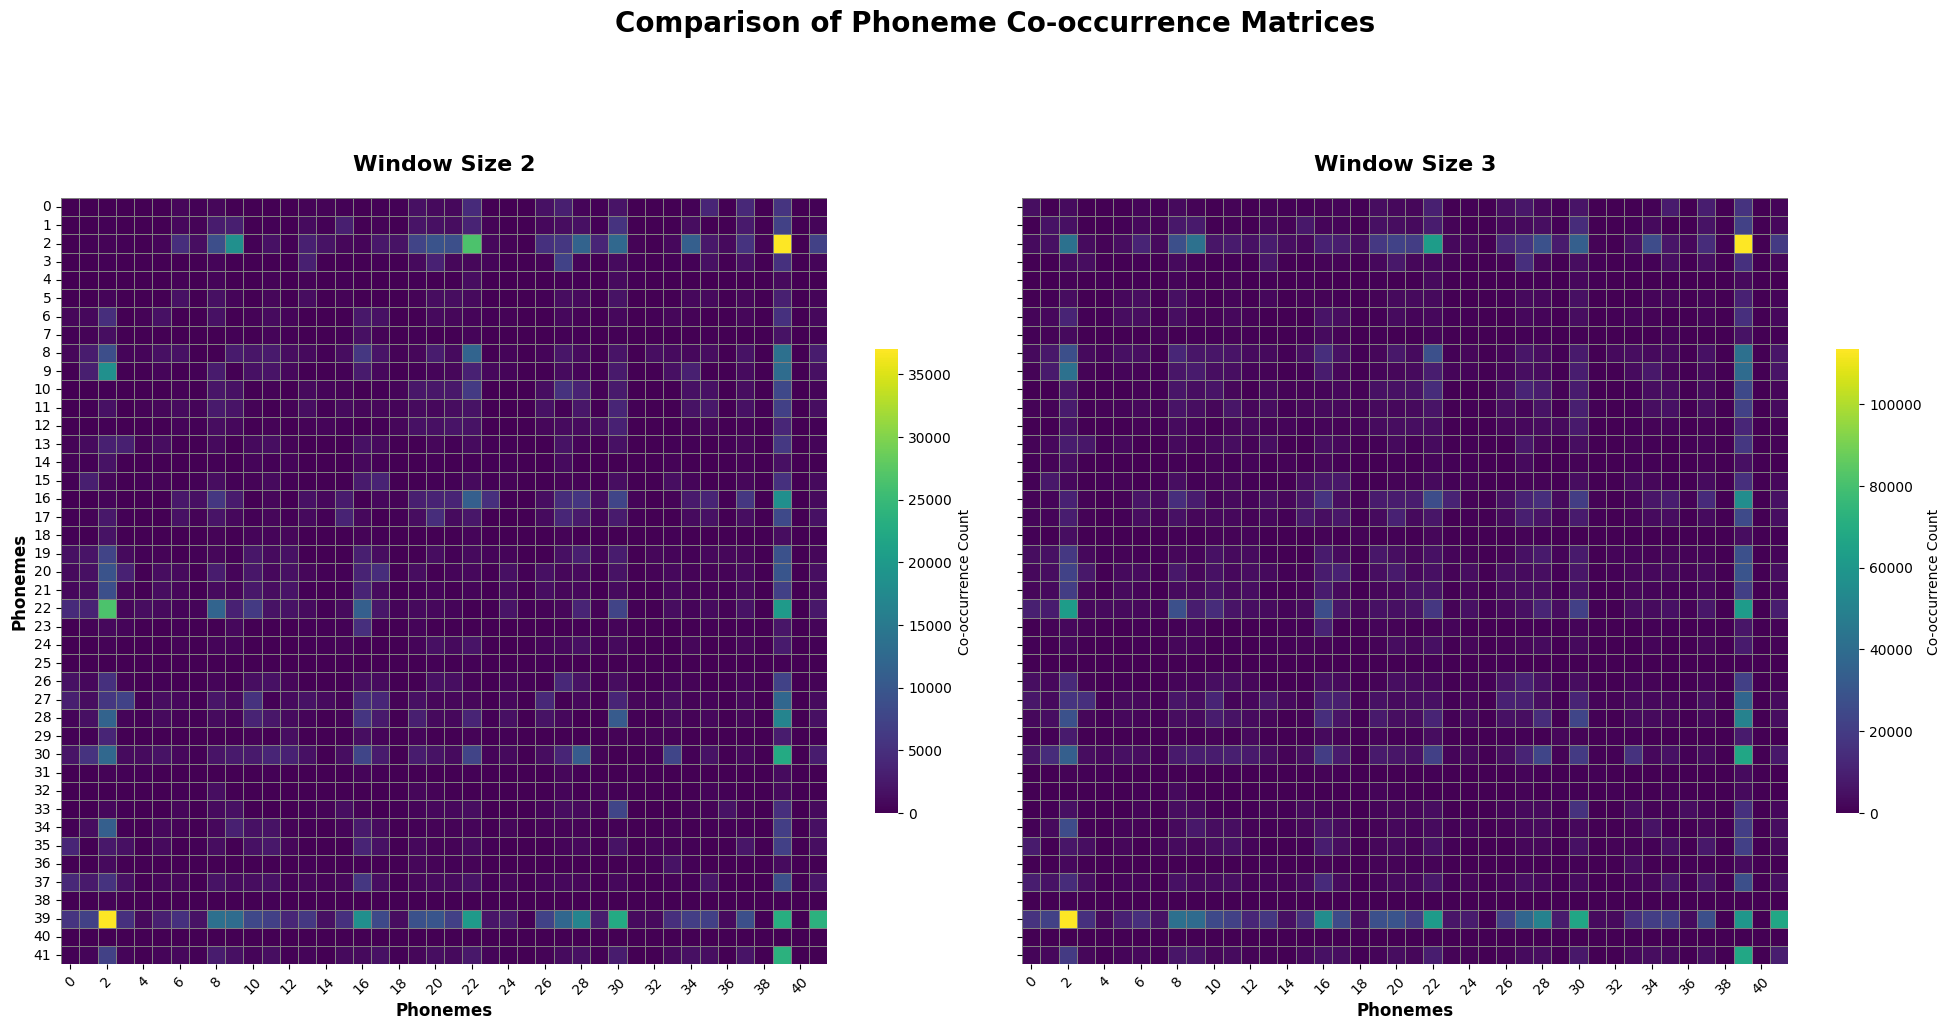

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    
# Heatmap for window size 2
sns.heatmap(
    cooccurrence_matrix_2,
    # annot=True,
    # fmt='d',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': .5, 'label': 'Co-occurrence Count'},
    ax=ax1
)
ax1.set_title('Window Size 2', fontsize=16, pad=20, weight='bold')
ax1.set_xlabel('Phonemes', fontsize=12, weight='bold')
ax1.set_ylabel('Phonemes', fontsize=12, weight='bold')
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.tick_params(axis='y', rotation=0, labelsize=10)

# Heatmap for window size 3
sns.heatmap(
    cooccurrence_matrix_3,
    # annot=True,
    # fmt='d',
    cmap='viridis',
    square=True,
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'shrink': .5, 'label': 'Co-occurrence Count'},
    ax=ax2
)
ax2.set_title('Window Size 3', fontsize=16, pad=20, weight='bold')
ax2.set_xlabel('Phonemes', fontsize=12, weight='bold')
ax2.set_ylabel('')  # Shared y-axis, no label needed
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', rotation=0, labelsize=10)

# Add a super title for the entire figure
fig.suptitle('Comparison of Phoneme Co-occurrence Matrices', fontsize=20, weight='bold', y=1.05)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
np.savetxt("cooccurrence_matrix_window_2.txt", cooccurrence_matrix, fmt="%d")
np.savetxt("cooccurrence_matrix_window_3.txt", cooccurrence_matrix, fmt="%d")